In [ ]:
import pandas as pd
import string
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def compute_text_stats(df):
    data = {}
    # Number of samples in dataset
    num_samples = len(df)

    # Total number of characters in dataset
    total_chars = df['message'].apply(lambda x: len(x)).sum()

    # Average number of characters per sample
    avg_chars = total_chars / num_samples

    # Total number of words in dataset
    total_words = df['message'].apply(lambda x: len(x.split())).sum()

    # Average number of words per sample
    avg_words = total_words / num_samples

    # Total number of unique words in dataset
    unique_words = set(df['message'].str.split().sum())
    num_unique_words = len(unique_words)

    # Average number of unique words per sample
    avg_unique_words = len(unique_words) / num_samples

    # Number of stopwords in dataset
    stop_words = set(stopwords.words('english'))
    num_stop_words = df['message'].apply(lambda x: len([word for word in x.lower().split() if word in stop_words])).sum()

    # Average number of stopwords per sample
    avg_stop_words = num_stop_words / num_samples

    # Number of punctuations in dataset
    num_punctuations = df['message'].apply(lambda x: len([char for char in x if char in string.punctuation])).sum()

    # Average number of punctuations per sample
    avg_punctuations = num_punctuations / num_samples

    # Average sentence length
    sent_tokenize = nltk.tokenize.sent_tokenize
    df['sentences'] = df['message'].apply(sent_tokenize)
    avg_sent_len = df['sentences'].apply(lambda x: len(x)).sum() / num_samples

    # Distribution of sentence lengths
    sent_lengths = [len(sent.split()) for sent in df['message']]
    max_sent_length = np.max(sent_lengths)
    min_sent_length = np.min(sent_lengths)
    mean_sent_length = np.mean(sent_lengths)
    median_sent_length = np.median(sent_lengths)

    # Print out the statistics
    # print(f'Number of samples: {num_samples}')
    # print(f'Total number of characters: {total_chars}')
    # print(f'Average number of characters per sample: {avg_chars:.2f}')
    # print(f'Total number of words: {total_words}')
    # print(f'Average number of words per sample: {avg_words:.2f}')
    # print(f'Number of unique words: {num_unique_words}')
    # print(f'Average number of unique words per sample: {avg_unique_words:.2f}')
    # print(f'Number of stopwords: {num_stop_words}')
    # print(f'Average number of stopwords per sample: {avg_stop_words:.2f}')
    # print(f'Number of punctuations: {num_punctuations}')
    # print(f'Average number of punctuations per sample: {avg_punctuations:.2f}')
    # print(f'Average sentence length: {avg_sent_len:.2f}')
    # print("Maximum sentence length: {}".format(max_sent_length))
    # print("Minimum sentence length: {}".format(min_sent_length))
    # print("Mean sentence length: {:.2f}".format(mean_sent_length))
    # print("Median sentence length: {}".format(median_sent_length))

    data = {
        "Number of samples": num_samples,
        "Total number of characters": total_chars,
        "Average number of characters per sample": avg_chars,
        "Total number of words": total_words,
        "Average number of words per sample": avg_words,
        "Number of unique words": num_unique_words,
        "Average number of unique words per sample": avg_unique_words,
        "Number of stopwords": num_stop_words,
        "Average number of stopwords per sample": avg_stop_words,
        "Number of punctuations": num_punctuations,
        "Average number of punctuations per sample": avg_punctuations,
        "Average sentence length": avg_sent_len,
        "Maximum sentence length": max_sent_length,
        "Minimum sentence length": min_sent_length,
        "Mean sentence length": mean_sent_length,
        "Median sentence length": median_sent_length
    }

    return data

# No Augmentation

## Withoout Pre-processing

In [ ]:
# before augmentation
df = pd.read_csv('base_df.csv')
df['message'] = df['message'].astype(str)
df = df[df['category'] != -1]
df = df.dropna()

display(df)

# Compute text statistics
data = compute_text_stats(df)
data

,Unnamed: 0,message,category,field
0,0,Hi there! I am ready whenever you are :),124,generic
1,1,"yes, I agree. Information transmission is a pr...",124,transmission
2,2,"okay, thanks again. bye",124,generic
3,3,"Again to Jill: Yes, I agree with the behaviori...",123,transmission
4,4,All right. Thanks for the interesting discussi...,123,interactivity
...,...,...,...,...
4937,4937,"Uhm, I am running out of ideas...",101,generic
4938,4938,Do you both agree with the following statement...,101,technology
4939,4939,yes. technology refers to tools and machines t...,101,technology
4940,4940,Do you both agree with the following statement...,101,legit


{'Number of samples': 4938,
 'Total number of characters': 446362,
 'Average number of characters per sample': 90.39327663021466,
 'Total number of words': 77680,
 'Average number of words per sample': 15.731065208586472,
 'Number of unique words': 5278,
 'Average number of unique words per sample': 1.0688537869582828,
 'Number of stopwords': 35605,
 'Average number of stopwords per sample': 7.2104090724989875,
 'Number of punctuations': 13435,
 'Average number of punctuations per sample': 2.7207371405427296,
 'Average sentence length': 1.5500202511138113,
 'Maximum sentence length': 186,
 'Minimum sentence length': 1,
 'Mean sentence length': 15.731065208586472,
 'Median sentence length': 10.0}

In [ ]:
whole_info = {}
whole_info['Original Without Augmentation'] = data

In [ ]:
# Class wise information
class_wise = {}
for f in df['field'].unique():
    temp_ = df[df['field'] == f]

    print(f"Class label:\t{f}\n")
    data = compute_text_stats(temp_)
    print(data)
    class_wise[f] = data
    print(70 * "-")


Class label:	generic

{'Number of samples': 3169, 'Total number of characters': 130782, 'Average number of characters per sample': 41.26917008520038, 'Total number of words': 25324, 'Average number of words per sample': 7.991164405175134, 'Number of unique words': 2894, 'Average number of unique words per sample': 0.9132218365414957, 'Number of stopwords': 11786, 'Average number of stopwords per sample': 3.7191543073524773, 'Number of punctuations': 5612, 'Average number of punctuations per sample': 1.7709056484695487, 'Average sentence length': 1.2660145156200695, 'Maximum sentence length': 65, 'Minimum sentence length': 1, 'Mean sentence length': 7.991164405175134, 'Median sentence length': 6.0}
----------------------------------------------------------------------
Class label:	transmission

{'Number of samples': 511, 'Total number of characters': 98560, 'Average number of characters per sample': 192.87671232876713, 'Total number of words': 16536, 'Average number of words per sample'

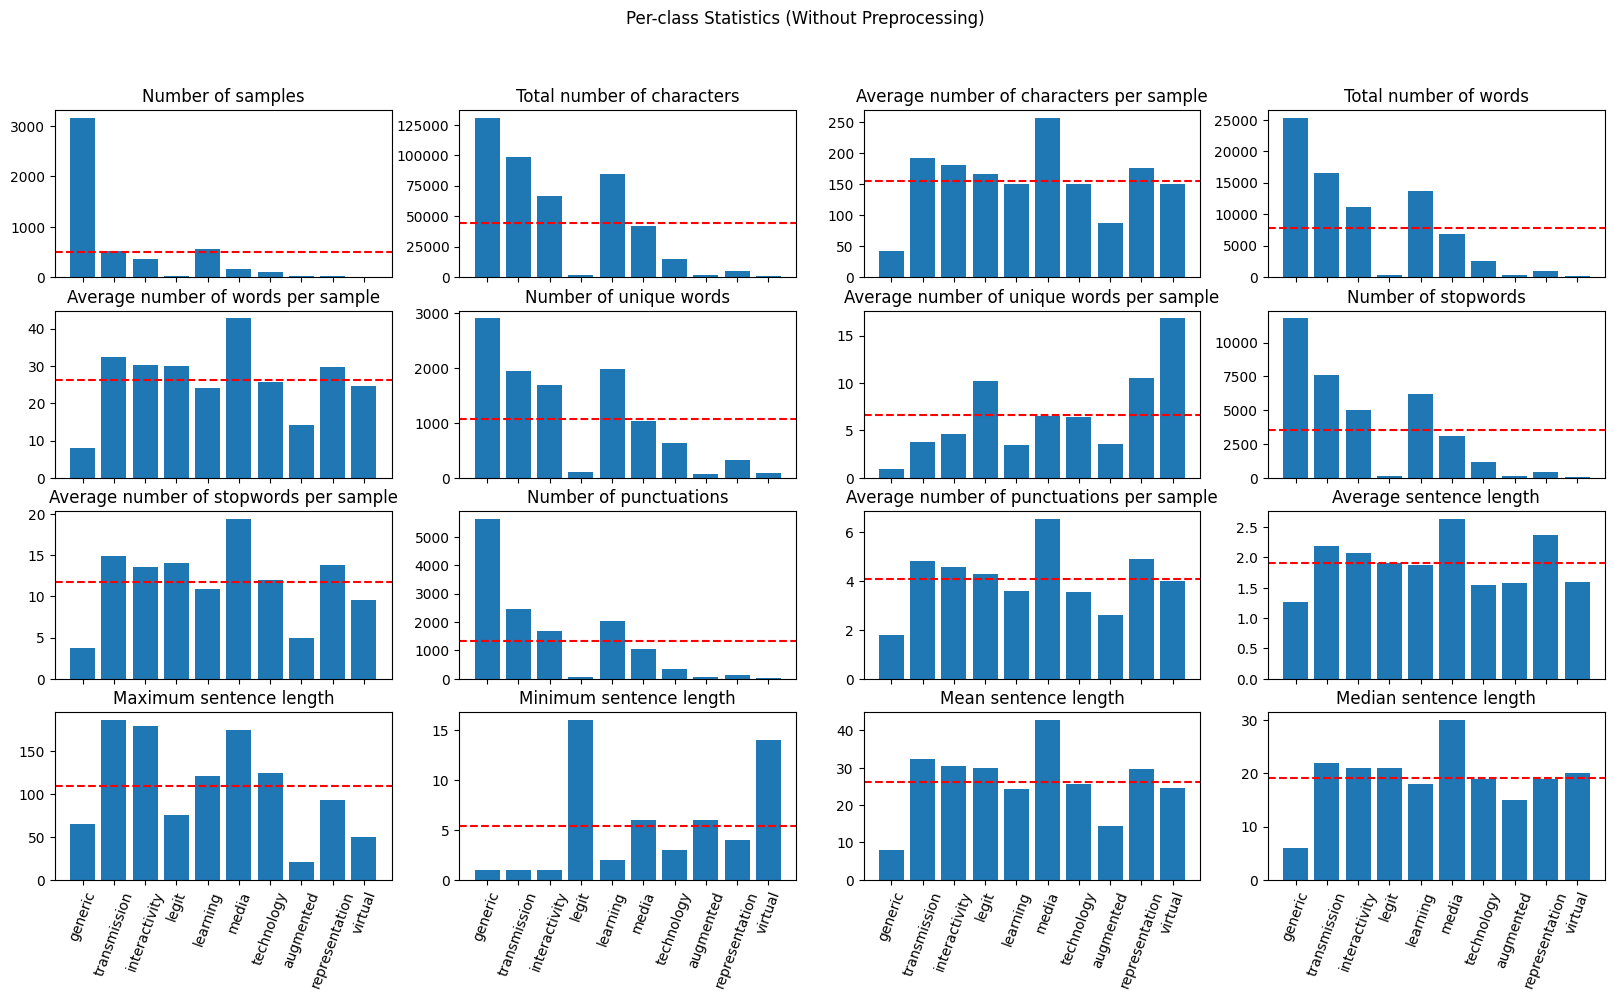

In [ ]:
def draw_subplots(data, title):
    # Extract subplot names
    for d in data:
        temp_ = data[d]
        names = list(temp_.keys())
        break

    data_to_plot = {}

    for name in names:
        if name not in data_to_plot:
            data_to_plot[name] = {}
        for d in data:
            data_to_plot[name][d] = data[d][name]

    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,10))

    for i, sub_title in enumerate(data_to_plot.keys()):
        row_idx = i // 4
        col_idx = i % 4
        axs[row_idx, col_idx].bar(data_to_plot[sub_title].keys(), data_to_plot[sub_title].values())
        axs[row_idx, col_idx].set_title(sub_title)
        axs[row_idx, col_idx].axhline(y = np.mean(list(data_to_plot[sub_title].values())), color = 'r', linestyle='--')

        if row_idx == 3:
            axs[row_idx, col_idx].set_xticklabels(data_to_plot[sub_title].keys(), rotation = 70)
        else:
            axs[row_idx, col_idx].tick_params(labelbottom=False)

    # for ax in fig.get_axes():
    #         ax.label_outer()

    # plt.tight_layout()
    plt.suptitle(title)
    plt.show()

draw_subplots(class_wise, "Per-class Statistics (Without Preprocessing)")

## With Pre-processing

In [ ]:
# With preprocessin + no augmentation
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['message'] = df['message'].apply(clean_text)
df

,Unnamed: 0,message,category,field,sentences
0,0,hi ready whenever,124,generic,"[Hi there!, I am ready whenever you are :)]"
1,1,yes agree information transmission process com...,124,transmission,"[yes, I agree., Information transmission is a ..."
2,2,okay thanks bye,124,generic,"[okay, thanks again., bye]"
3,3,jill yes agree behavioristic view reinforcemen...,123,transmission,"[Again to Jill: Yes, I agree with the behavior..."
4,4,right thanks interesting discussion getting in...,123,interactivity,"[All right., Thanks for the interesting discus..."
...,...,...,...,...,...
4937,4937,uhm running ideas,101,generic,"[Uhm, I am running out of ideas...]"
4938,4938,agree following statement technology refers tools,101,technology,[Do you both agree with the following statemen...
4939,4939,yes technology refers tools machines may used ...,101,technology,"[yes., technology refers to tools and machines..."
4940,4940,agree following statement google effect refers...,101,legit,[Do you both agree with the following statemen...


In [ ]:
# Compute text statistics
data = compute_text_stats(df)
data

{'Number of samples': 4938,
 'Total number of characters': 288438,
 'Average number of characters per sample': 58.41190765492102,
 'Total number of words': 39981,
 'Average number of words per sample': 8.096597812879708,
 'Number of unique words': 3066,
 'Average number of unique words per sample': 0.6208991494532199,
 'Number of stopwords': 0,
 'Average number of stopwords per sample': 0.0,
 'Number of punctuations': 20,
 'Average number of punctuations per sample': 0.004050222762251924,
 'Average sentence length': 0.9686107735925475,
 'Maximum sentence length': 108,
 'Minimum sentence length': 0,
 'Mean sentence length': 8.096597812879708,
 'Median sentence length': 5.0}

In [ ]:
whole_info['Preprocessed Without Augmentation'] = data

Class label:	generic

{'Number of samples': 3169, 'Total number of characters': 77040, 'Average number of characters per sample': 24.31050804670243, 'Total number of words': 12239, 'Average number of words per sample': 3.862101609340486, 'Number of unique words': 1718, 'Average number of unique words per sample': 0.5421268538971284, 'Number of stopwords': 0, 'Average number of stopwords per sample': 0.0, 'Number of punctuations': 13, 'Average number of punctuations per sample': 0.0041022404544020195, 'Average sentence length': 0.9510886715052067, 'Maximum sentence length': 39, 'Minimum sentence length': 0, 'Mean sentence length': 3.862101609340486, 'Median sentence length': 3.0}
----------------------------------------------------------------------
Class label:	transmission

{'Number of samples': 511, 'Total number of characters': 65244, 'Average number of characters per sample': 127.67906066536203, 'Total number of words': 8665, 'Average number of words per sample': 16.956947162426616

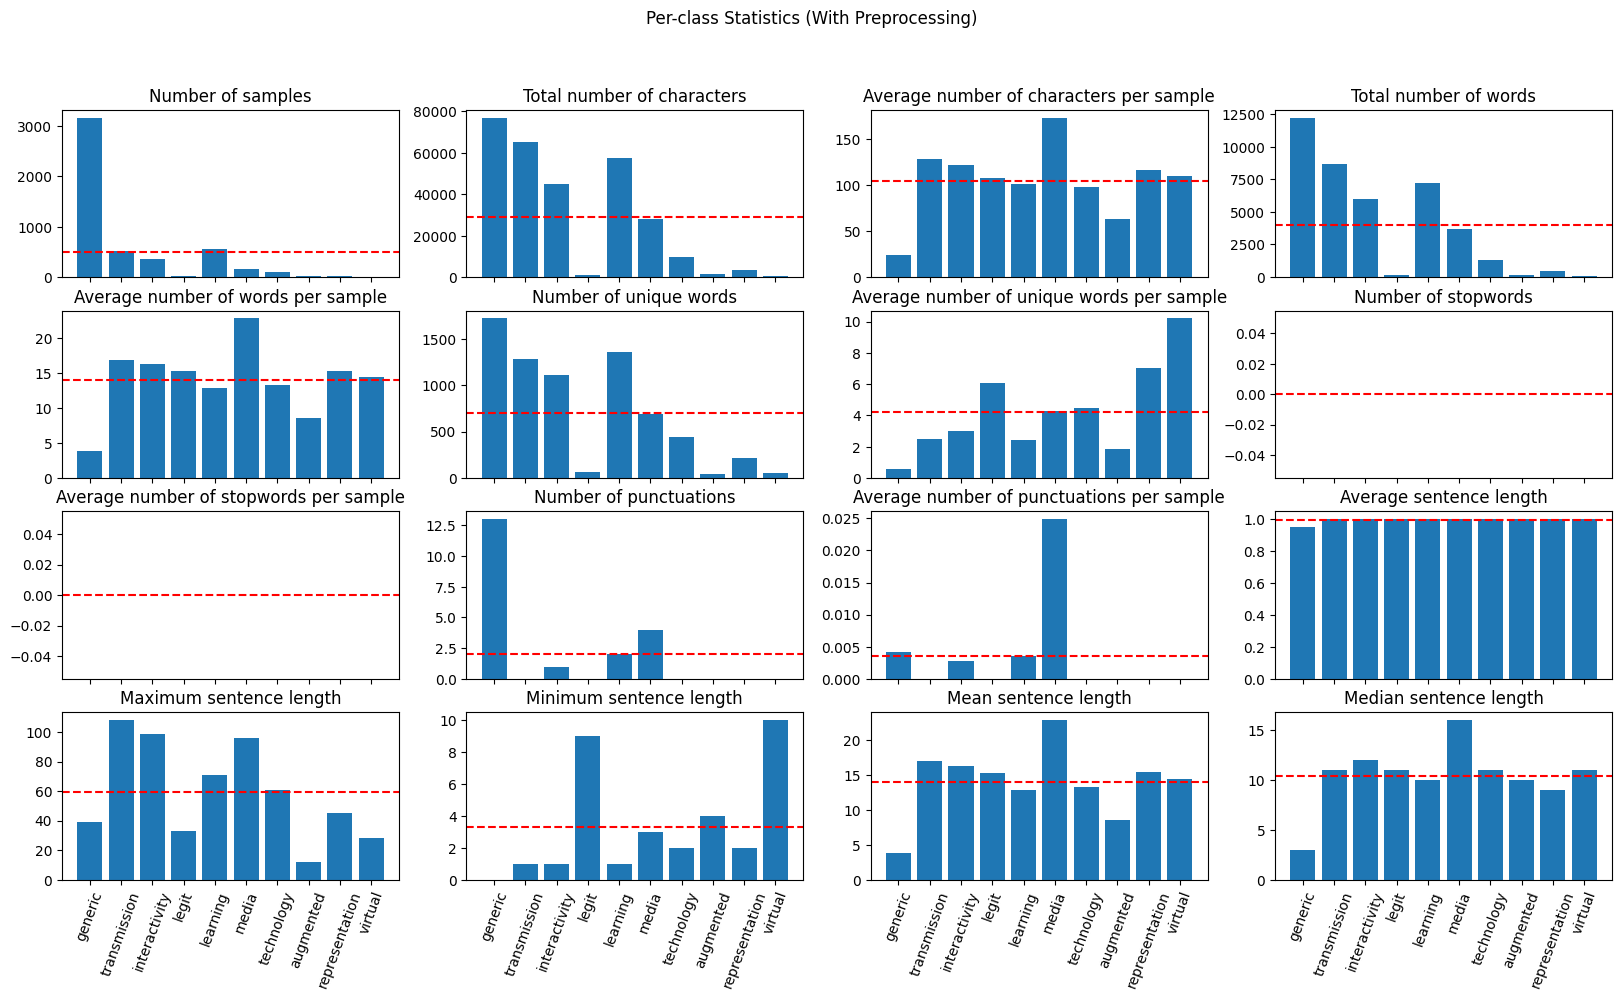

In [ ]:
# Class wise information
class_wise = {}
for f in df['field'].unique():
    temp_ = df[df['field'] == f]

    print(f"Class label:\t{f}\n")
    data = compute_text_stats(temp_)
    print(data)
    class_wise[f] = data
    print(70 * "-")

draw_subplots(class_wise, "Per-class Statistics (With Preprocessing)")

# With augmentation

## Without Pre-processing

In [ ]:
df = pd.read_csv('updated_final_df.csv')
df['message'] = df['message'].astype(str)
df = df.dropna()

display(df)

# Compute text statistics
data = compute_text_stats(df)
data

,Unnamed: 0,original_df_index,room_number,topic_field,augmenter,message
0,0,0,124,generic,glove glove.6B.300d.txt substitute1,Hi there! I am did kind you kinds
1,1,0,124,generic,ContextualWordEmbsAug bert-base-uncased insert0,hi back there! i am ready whenever anyone you ...
2,2,0,124,generic,ContextualWordEmbsAug distilbert-base-uncased ...,hi there! i grow ready whenever i go
3,3,0,124,generic,ContextualWordEmbsAug bert-base-uncased substi...,yes mom! but am ready whenever you are
4,4,0,124,generic,word2vec GoogleNews-vectors-negative300.bin in...,Hi INSURV there! I am ready Holder whenever sh...
...,...,...,...,...,...,...
148395,148395,1004,0,learning,glove glove.6B.300d.txt substitute1,Badges although digital used facial projective...
148396,148396,1004,0,learning,ContextualWordEmbsAug bert-base-uncased substi...,grades are manual process printed representati...
148397,148397,1004,0,learning,SynonymAug wordnet1,Badges are digital or physical representations...
148398,148398,1004,0,learning,ContextualWordEmbsAug distilbert-base-uncased ...,badges provide verbal or physical representati...


{'Number of samples': 148400,
 'Total number of characters': 17331232,
 'Average number of characters per sample': 116.78727762803234,
 'Total number of words': 2796391,
 'Average number of words per sample': 18.843605121293802,
 'Number of unique words': 227604,
 'Average number of unique words per sample': 1.5337196765498653,
 'Number of stopwords': 1035425,
 'Average number of stopwords per sample': 6.977257412398922,
 'Number of punctuations': 488592,
 'Average number of punctuations per sample': 3.292398921832884,
 'Average sentence length': 1.5226954177897574,
 'Maximum sentence length': 213,
 'Minimum sentence length': 1,
 'Mean sentence length': 18.843605121293802,
 'Median sentence length': 14.0}

In [ ]:
whole_info['Original With Augmentation'] = data

Class label:	generic

{'Number of samples': 79075, 'Total number of characters': 4238150, 'Average number of characters per sample': 53.59658552007588, 'Total number of words': 754466, 'Average number of words per sample': 9.541144483085677, 'Number of unique words': 97586, 'Average number of unique words per sample': 1.234094214353462, 'Number of stopwords': 275686, 'Average number of stopwords per sample': 3.4863863420803036, 'Number of punctuations': 177514, 'Average number of punctuations per sample': 2.2448814416693015, 'Average sentence length': 1.3271198229528929, 'Maximum sentence length': 76, 'Minimum sentence length': 1, 'Mean sentence length': 9.541144483085677, 'Median sentence length': 7.0}
----------------------------------------------------------------------
Class label:	transmission

{'Number of samples': 18450, 'Total number of characters': 3622007, 'Average number of characters per sample': 196.31474254742548, 'Total number of words': 578432, 'Average number of words 

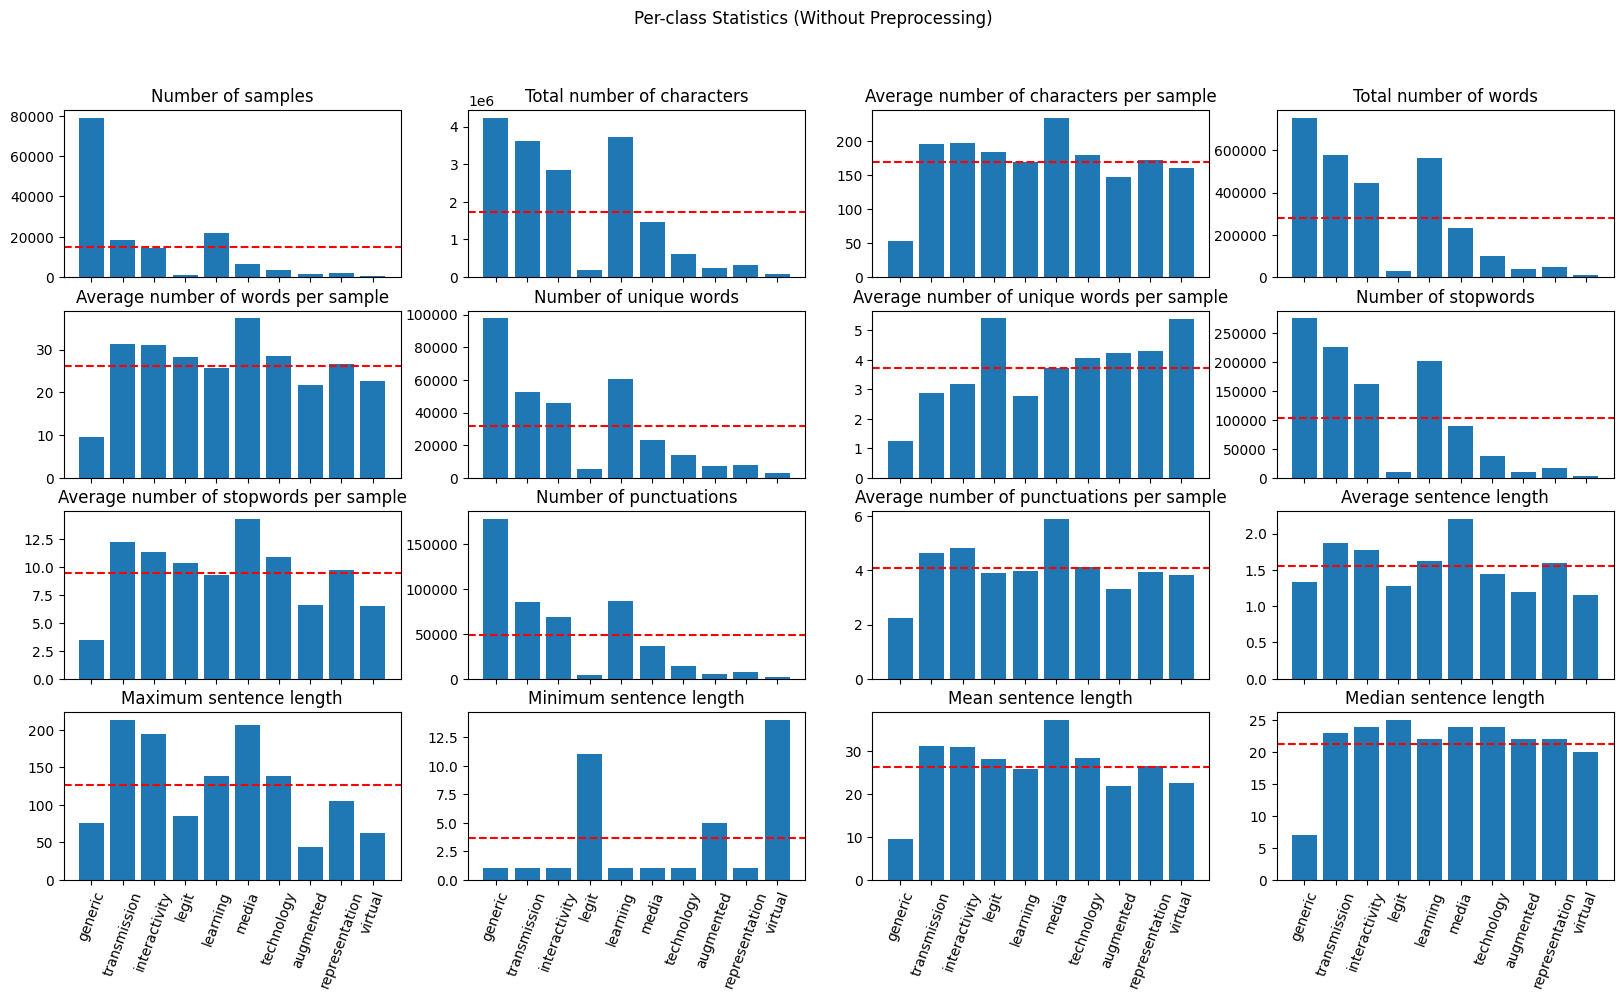

In [ ]:
# Class wise information
class_wise = {}
for f in df['topic_field'].unique():
    temp_ = df[df['topic_field'] == f]

    print(f"Class label:\t{f}\n")
    data = compute_text_stats(temp_)
    print(data)
    class_wise[f] = data
    print(70 * "-")

draw_subplots(class_wise, "Per-class Statistics (Without Preprocessing)")

## With Preprocessing

In [ ]:
df['message'] = df['message'].apply(clean_text)
display(df)

data = compute_text_stats(df)
data

,Unnamed: 0,original_df_index,room_number,topic_field,augmenter,message,sentences
0,0,0,124,generic,glove glove.6B.300d.txt substitute1,hi kind kinds,"[Hi there!, I am did kind you kinds]"
1,1,0,124,generic,ContextualWordEmbsAug bert-base-uncased insert0,hi back ready whenever anyone want,"[hi back there!, i am ready whenever anyone yo..."
2,2,0,124,generic,ContextualWordEmbsAug distilbert-base-uncased ...,hi grow ready whenever go,"[hi there!, i grow ready whenever i go]"
3,3,0,124,generic,ContextualWordEmbsAug bert-base-uncased substi...,yes mom ready whenever,"[yes mom!, but am ready whenever you are]"
4,4,0,124,generic,word2vec GoogleNews-vectors-negative300.bin in...,hi insurv ready holder whenever shawarma,"[Hi INSURV there!, I am ready Holder whenever ..."
...,...,...,...,...,...,...,...
148395,148395,1004,0,learning,glove glove.6B.300d.txt substitute1,badges although digital used facial projective...,[Badges although digital used facial projectiv...
148396,148396,1004,0,learning,ContextualWordEmbsAug bert-base-uncased substi...,grades manual process printed representations ...,[grades are manual process printed representat...
148397,148397,1004,0,learning,SynonymAug wordnet1,badges digital physical representations achiev...,[Badges are digital or physical representation...
148398,148398,1004,0,learning,ContextualWordEmbsAug distilbert-base-uncased ...,badges provide verbal physical representations...,[badges provide verbal or physical representat...


{'Number of samples': 148400,
 'Total number of characters': 12601232,
 'Average number of characters per sample': 84.91396226415094,
 'Total number of words': 1641708,
 'Average number of words per sample': 11.062722371967656,
 'Number of unique words': 175778,
 'Average number of unique words per sample': 1.184487870619946,
 'Number of stopwords': 0,
 'Average number of stopwords per sample': 0.0,
 'Number of punctuations': 39433,
 'Average number of punctuations per sample': 0.2657210242587601,
 'Average sentence length': 0.9845283018867924,
 'Maximum sentence length': 121,
 'Minimum sentence length': 0,
 'Mean sentence length': 11.062722371967656,
 'Median sentence length': 9.0}

In [ ]:
whole_info['Preprocessed With Augmentation'] = data


Class label:	generic

{'Number of samples': 79075, 'Total number of characters': 2910472, 'Average number of characters per sample': 36.806474865633895, 'Total number of words': 423443, 'Average number of words per sample': 5.354954157445463, 'Number of unique words': 76004, 'Average number of unique words per sample': 0.9611634524185899, 'Number of stopwords': 0, 'Average number of stopwords per sample': 0.0, 'Number of punctuations': 14216, 'Average number of punctuations per sample': 0.1797786911160291, 'Average sentence length': 0.9711160290863105, 'Maximum sentence length': 50, 'Minimum sentence length': 0, 'Mean sentence length': 5.354954157445463, 'Median sentence length': 4.0}
----------------------------------------------------------------------
Class label:	transmission

{'Number of samples': 18450, 'Total number of characters': 2616523, 'Average number of characters per sample': 141.81696476964768, 'Total number of words': 333675, 'Average number of words per sample': 18.085

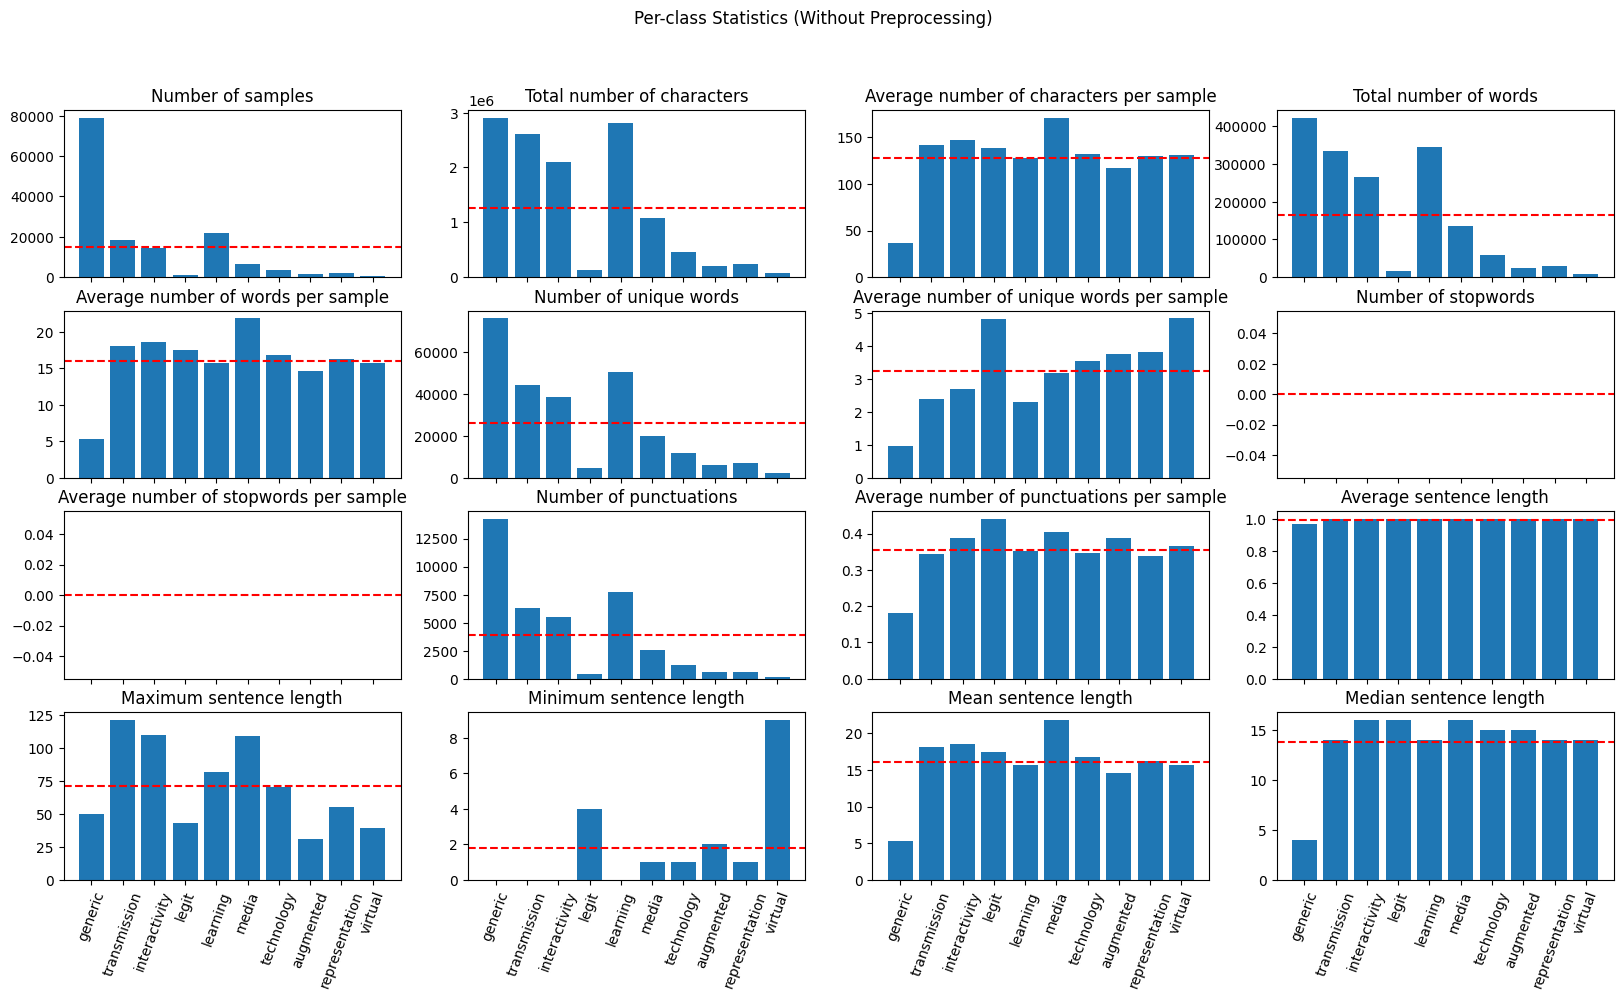

In [ ]:
# Class wise information
class_wise = {}
for f in df['topic_field'].unique():
    temp_ = df[df['topic_field'] == f]

    print(f"Class label:\t{f}\n")
    data = compute_text_stats(temp_)
    print(data)
    class_wise[f] = data
    print(70 * "-")

draw_subplots(class_wise, "Per-class Statistics (Without Preprocessing)")

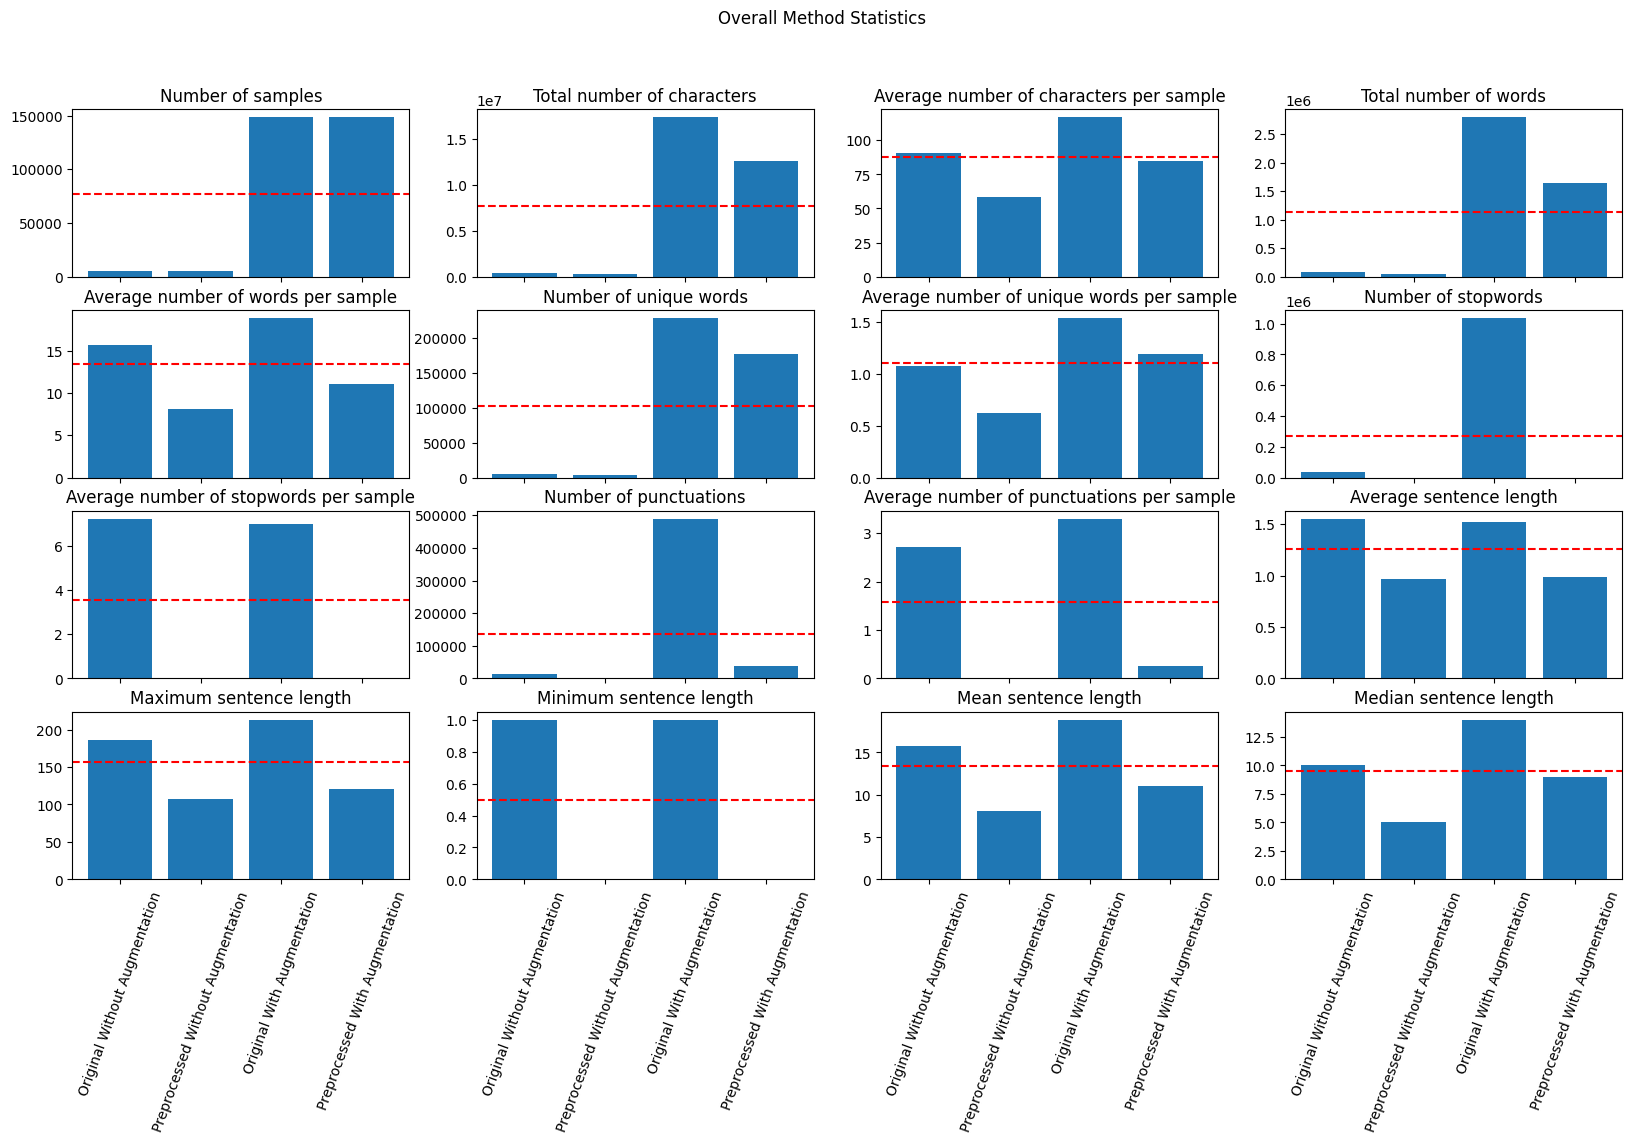

In [ ]:
draw_subplots(whole_info, "Overall Method Statistics")

In [ ]:
whole_info

{'Original Without Augmentation': {'Number of samples': 4938,
  'Total number of characters': 446362,
  'Average number of characters per sample': 90.39327663021466,
  'Total number of words': 77680,
  'Average number of words per sample': 15.731065208586472,
  'Number of unique words': 5278,
  'Average number of unique words per sample': 1.0688537869582828,
  'Number of stopwords': 35605,
  'Average number of stopwords per sample': 7.2104090724989875,
  'Number of punctuations': 13435,
  'Average number of punctuations per sample': 2.7207371405427296,
  'Average sentence length': 1.5500202511138113,
  'Maximum sentence length': 186,
  'Minimum sentence length': 1,
  'Mean sentence length': 15.731065208586472,
  'Median sentence length': 10.0},
 'Preprocessed Without Augmentation': {'Number of samples': 4938,
  'Total number of characters': 288438,
  'Average number of characters per sample': 58.41190765492102,
  'Total number of words': 39981,
  'Average number of words per sample': 8